# ch01_02_DNN기초-텐서플로우를 이용한 모델링

---
* 날짜:
* 이름:

## 학습내용
    - 텐서플로우를 이용해 모델을 구현한다.
    - 생성한 모델을 이용해 순전파 계산을 진행한다.
    - 텐서플로우로 모델을 구현하는 여러 방법에 대핼 배워본다. 

## 학습자료


- 케라스 창시자에게 배우는 딥러닝
- 텐서플로우 케라스 : https://www.tensorflow.org/?hl=ko


## DNN 기본 이해
---


### | 모델링 (1)


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-01.png?raw=true width=450>
</p>


#### **모델 구현**

In [17]:
import numpy as np
from tensorflow.keras import layers, models

x = layers.Input(shape=(3), name='input_layer') # X : 1(데이터개수),3
y = layers.Dense(1, name='output_layer')(x) #Linear : W, b Dense(output_shape)

model1 = models.Model(inputs=x, outputs=y)

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 output_layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


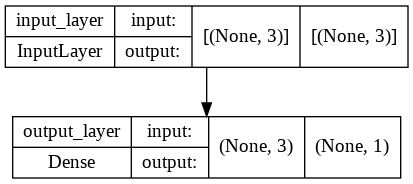

In [18]:
from tensorflow.keras import utils
# output shape : 데이터 변환 과정
# None : 데이터 개수
# Param # : 파라미터 개수
model1.summary()

utils.plot_model(model1, show_shapes=True)

# Trainable param : 학습 가능한 파라미터(역전파 통해서 업데이트)
# Non-trainable param : 학습 하지 않는 파라미터


#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-04.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`


In [11]:
# output : 데이터의 변환 과정
for layer in model1.layers:
  print(layer.name) #각 레이어의 이름
  print(layer.output.shape)



imput_layer
(None, 3)
output_layer
(None, 1)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [16]:
'''
W : (3, 1)
B : (1, )
'''
for param in model1.get_weights():
  print(param.shape)

print(model1.get_weights())

(3, 1)
(1,)
[array([[ 0.8227643],
       [-0.3875053],
       [-0.3348754]], dtype=float32), array([0.], dtype=float32)]


#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [20]:
X = np.random.normal(size=(1,3))
print(X)
Y_pred = model1.predict(X)
print(Y_pred)

[[ 0.183519   -2.19909267 -1.6257279 ]]
[[-1.8689643]]


### | 모델링 (2)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-02.png?raw=true width=450>
</p>


#### **모델 구현**

In [53]:
model2 = tf.keras.Sequential()
model2.add(layers.Input(3))
model2.add(layers.Dense(2))

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 2)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


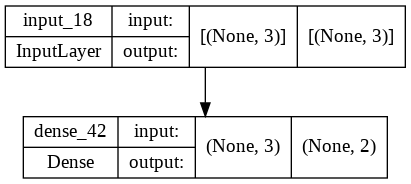

In [55]:
model2.summary()
utils.plot_model(model2, show_shapes=True)

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-05.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`


In [63]:
for layer in model2.layers:
  print(layer.name) 
  print(layer.output.shape)

dense_42
(None, 2)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [66]:
'''
W : (3, 2)
B : (2, )
'''
for param in model2.get_weights():
  print(param.shape)

print(model2.get_weights())

(3, 2)
(2,)
[array([[ 0.82389235,  0.00536215],
       [ 0.5803597 ,  0.72238743],
       [ 0.11571026, -0.08862281]], dtype=float32), array([0., 0.], dtype=float32)]


#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [67]:
X = np.random.normal(size=(1,3))
print(X)
Y_pred = model2.predict(X)
print(Y_pred)

[[1.67697821 0.60741997 0.80484233]]
[[1.8273001  0.37645736]]


### | 모델링 (3)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-03.png?raw=true width=550>
</p>


#### **모델 구현**

In [69]:
model3 = tf.keras.Sequential()
model3.add(layers.Input(3))
model3.add(layers.Dense(3))
model3.add(layers.Dense(2))

* 모델 시각화
  * `.summary()`
  * `tensorflow.keras.utils.plot_model()`

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 3)                 12        
                                                                 
 dense_44 (Dense)            (None, 2)                 8         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


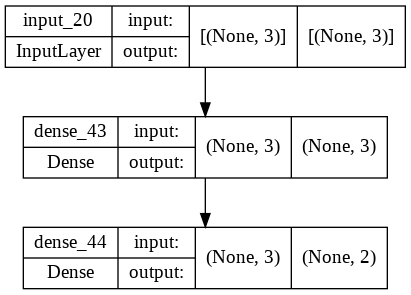

In [70]:
model3.summary()
utils.plot_model(model3, show_shapes=True)

#### **파라미터** 

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-06.png?raw=true width=900>
</p>


* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`



In [74]:
for layer in model3.layers:
  print(layer.name)
  print(layer.output_shape)

dense_43
(None, 3)
dense_44
(None, 2)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [79]:
for param in model3.get_weights():
  print(param.shape)

model3.get_weights()

(3, 3)
(3,)
(3, 2)
(2,)


[array([[ 0.66893363, -0.53152204,  0.7292428 ],
        [-0.38498402, -0.7067189 ,  0.25429845],
        [ 0.2994492 , -0.6360769 , -0.4493196 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.62326705,  0.17300427],
        [ 0.5954896 , -0.18118823],
        [-0.5162325 , -0.34061307]], dtype=float32),
 array([0., 0.], dtype=float32)]

#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [77]:
X = np.random.normal(size=(1,3))
Y_pred = model3.predict(X)

### | 모델링 (4)

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-12.png?raw=true width=820>

#### **모델 구현**

Model: "Model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_8 (Dense)             (None, 8)                 40        
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


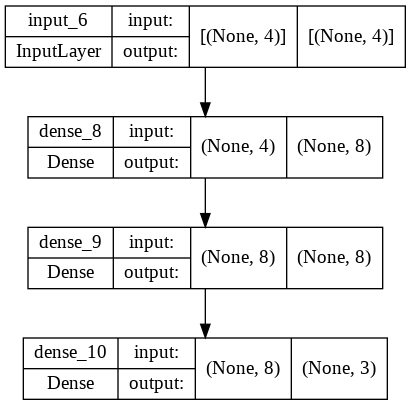

In [24]:
from tensorflow.keras import layers, models, utils

x = layers.Input(shape=(4,))
z1 = layers.Dense(8)(x)
z2 = layers.Dense(8)(z1)
y = layers.Dense(3)(z2)
model4 = models.Model(inputs=x, outputs=y, name='Model_4')

model4.summary()
utils.plot_model(model4, show_shapes=True)

#### **파라미터** 



* 데이터 플로우 : 데이터의 변환 과정을 확인하세요.
  * `layer.output`



In [27]:
'''
X : (N,4) N은 데이터 개수
Z1: (N,8)
Z2: (N,8)
Y : (N,3)
'''

for layer in model4.layers:
  print(layer.output.shape)
  

(None, 4)
(None, 8)
(None, 8)
(None, 3)


* 학습 파라미터 : 학습 파라미터의 shape를 확인하세요.
  * `.get_weights()`

In [28]:
'''
W1 : (4, 8)
B1 : (8,)
W2 : (8, 8)
B2 : (8,)
W3 : (8, 3)
B3 : (3,)
'''

for param in model4.get_weights():
  print(param.shape)
print(model4.get_weights())

(4, 8)
(8,)
(8, 8)
(8,)
(8, 3)
(3,)
[array([[-0.42652643,  0.06906605,  0.01567966,  0.58497435, -0.007195  ,
         0.35300094, -0.6077183 ,  0.08516157],
       [ 0.5912029 ,  0.6543767 , -0.39173827, -0.29548296,  0.6655387 ,
        -0.2638    ,  0.6318596 ,  0.600151  ],
       [ 0.54626113, -0.24691275,  0.16590416,  0.00523883,  0.10096174,
         0.58639747,  0.68761355,  0.41625375],
       [-0.23780885, -0.3116798 , -0.29605883, -0.10683298, -0.35250562,
        -0.1002655 ,  0.29244787,  0.5966237 ]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([[ 4.76831019e-01,  1.80634618e-01,  4.60981548e-01,
        -1.86328202e-01,  2.70092905e-01, -1.97088718e-03,
         5.27117074e-01, -1.58712834e-01],
       [ 3.54581475e-01,  3.30416083e-01, -8.25784206e-02,
         4.56990182e-01, -3.95183325e-01, -4.25969809e-01,
        -3.93358171e-01,  2.38854825e-01],
       [ 1.05992198e-01, -2.93011963e-01, -2.00140327e-01,
         4.12990749e-01, 

#### **순전파 계산**

현재 초기화되어 있는 학습파라미터를 이용해 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요.
* `np.random.normal`

In [29]:
X = np.random.normal(size=(1,4))
Y_pred = model4.predict(X)
print('X:', X, X.shape)
print('Y_pred:', Y_pred, Y_pred.shape)

X: [[-0.17658767  1.28329251 -0.72787452 -0.08037273]] (1, 4)
Y_pred: [[-0.03963822 -0.6221041   0.4334641 ]] (1, 3)


### | 병렬연산


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-13.png?raw=true width=820>



#### **순전파 계산**

Model3를 이용하여 Y를 계산해 보세요.
X는 랜덤한 숫자로 적용하세요. X의 샘플 개수는 10개 입니다.
* `np.random.normal`

In [30]:
# 실제 데이터 (1000~100000 중에 배치 단위로 계산이 진행됨) 배치 사이즈 : 8, 16, 32, 64
X = np.random.normal(size=(10,4)) # 배치의 개수가 10개다
Y_pred = model4.predict(X)
print('X:', X, X.shape)
print('Y_pred:', Y_pred, Y_pred.shape)

X: [[ 0.68423302  0.90342303  1.17124199 -0.48526096]
 [ 0.31335555 -1.10497328  0.38213436  0.13830612]
 [ 0.03694324  0.17066458  1.54098604  1.28305784]
 [ 1.17698143 -0.92976389 -1.34782583 -0.89277017]
 [-0.15546013 -1.2784093   2.46264441  0.18886537]
 [ 0.56203727 -0.95291763  1.32163077  0.93864502]
 [ 1.14964605  1.20792587 -1.46550214  1.14248101]
 [-0.47154718 -1.02141756  0.99848819  0.34281434]
 [ 1.18957735  0.10560926 -2.18272552 -1.6440385 ]
 [ 0.03345165 -0.0251644   0.34345891  1.69641035]] (10, 4)
Y_pred: [[ 0.362422   -0.30596745 -0.16251758]
 [ 0.15984678  0.39554405 -0.27557674]
 [-1.3344715   0.58545643  0.10653625]
 [ 1.9233835  -0.7340478  -0.08174004]
 [-0.7343656   1.3371102  -0.84377736]
 [-0.5213246   0.63898015 -0.1709385 ]
 [ 0.18999068 -1.2530066   1.1338407 ]
 [-0.6929566   0.93362284 -0.4117932 ]
 [ 2.5530226  -1.4725916   0.11171059]
 [-1.2784996   0.32529777  0.48552975]] (10, 3)


## 텐서플로우 - 모델을 만드는 세가지 방법
---

1. keras Sequential API
2. Keras Functional API
3. Model Class Subsclassing


In [31]:
import tensorflow as tf
from tensorflow.keras import models, layers, utils
import numpy as np
tf.__version__

'2.8.2'

아래 그림과 같은 모델을 텐서플로우를 이용해서 만들어 봅시다.

<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel1.PNG?raw=true width=600>

### | Keras Functional API

* 모델 구현

In [46]:
# 이 함수를 실행하면 아래와 같은 구성을 가진 모델이 반환
def build_model1():
  x = layers.Input(3)
  y = layers.Dense(6)(x)
  y = layers.Dense(6)(y)
  y = layers.Dense(1)(y)
  model = models.Model(x,y)
  return model

* 시각화

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_38 (Dense)            (None, 6)                 24        
                                                                 
 dense_39 (Dense)            (None, 6)                 42        
                                                                 
 dense_40 (Dense)            (None, 1)                 7         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


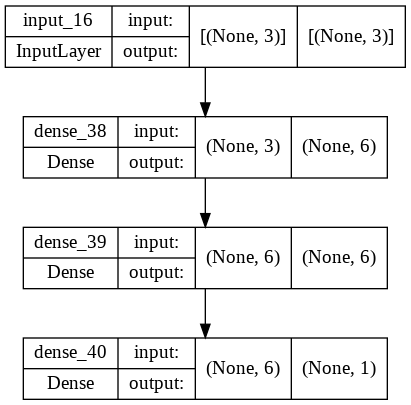

In [47]:
m1 = build_model1()
m1.summary()
utils.plot_model(m1, show_shapes=True)

### | Keras Sequential API



* 모델 구현: `Sequential()`

In [41]:
def build_model2():
  model = tf.keras.Sequential()
  model.add( layers.Input(shape=(3,)) )
  model.add( layers.Dense(6) )
  model.add( layers.Dense(6) )
  model.add( layers.Dense(1) )
  return model
  

* 모델 시각화

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 6)                 24        
                                                                 
 dense_33 (Dense)            (None, 6)                 42        
                                                                 
 dense_34 (Dense)            (None, 1)                 7         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


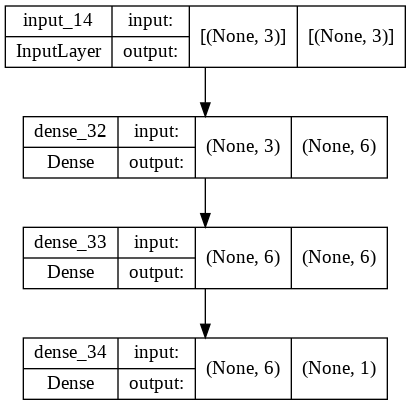

In [43]:
m2 = build_model2()
m2.summary()
utils.plot_model(m2, show_shapes=True)

### | Model Class Subclassing

* 모델 구현

In [48]:
class Model3(tf.keras.Model): # 이미 존재하는 클래스를 불러올때
  def __init__(self):
    super(Model3, self).__init__() # tf.keras.Model 에 이미 정의되어 있는 (init)파라미터 불러오기
    self._name= 'Model3'
    self._input_shape=(3)
    self.dense1 = layers.Dense(6, name='dense1')
    self.dense2 = layers.Dense(6, name='dense2')
    self.dense3 = layers.Dense(6, name='dense3')

  def call(self, x):
    y = self.dense1(x)
    y = self.dense2(y)
    y = self.dense3(y)
    return y

* 모델 시각화

Model: "Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              multiple                  24        
                                                                 
 dense2 (Dense)              multiple                  42        
                                                                 
 dense3 (Dense)              multiple                  42        
                                                                 
Total params: 108
Trainable params: 108
Non-trainable params: 0
_________________________________________________________________


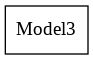

In [51]:
m3 = Model3()
m3(np.array([[1,2,1]]))
m3.summary()
utils.plot_model(m3, show_shapes=True)

### | 예제

세가지 방법을 이용해 아래 모델을 구현하세요.

#### **예제 01**

<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel2.PNG?raw=true width=500>


* Keras Functional API


In [80]:
def model_KF():
  x = layer.Input(4)
  z1 = layer.Dense(8)(x)
  z2 = layer.Dense(8)(z1)
  y = layer.Dense(3)(z2)
  model = models.Model(x, y)
  return model


* keras Sequential API


In [84]:
def model_KS():
  model = tf.keras.Sequential()
  model.add(layer.Input(4))
  model.add(layer.Dense(8))
  model.add(layer.Dense(8))
  model.add(layer.Dense(3))
  return model

* Model Class Subsclassing




In [85]:
class model_MCS(tf.keras.Model):
  def __init__(self):
    super(model_MCS, self).__init__()
    self._name= 'model_MCS'
    self._input_shape=(4)
    self.dense1 = layers.Dense(8, name='dense1')
    self.dense2 = layers.Dense(8, name='dense2')
    self.dense3 = layers.Dense(3, name='dense3')

  def call(self, x):
    y = self.dense1(x)
    y = self.dense2(y)
    y = self.dense3(y)
    return y

#### **예제 02**




<p align='center'>
<img src=https://github.com/yebiny/NCS-lecture-deeplearning/blob/main/imgs/01-testmodel3.PNG?raw=true width=700>


* Keras Functional API


In [83]:
def model_KF():
  x = layer.Input(3)
  z1 = layer.Dense(4)(x)
  z2 = layer.Dense(7)(z1)
  z3 = layer.Dense(4)(z2)
  y = layer.Dense(1)(z3)
  model = models.Model(x, y)
  return model


* keras Sequential API


In [86]:
def model_KS():
  model = tf.keras.Sequential()
  model.add(layer.Input(3))
  model.add(layer.Dense(4))
  model.add(layer.Dense(7))
  model.add(layer.Dense(4))
  model.add(layer.Dense(1))
  return model

* Model Class Subsclassing



In [87]:
class model_MCS(tf.keras.Model):
  def __init__(self):
    super(model_MCS, self).__init__()
    self._name= 'model_MCS'
    self._input_shape=(3)
    self.dense1 = layers.Dense(4, name='dense1')
    self.dense2 = layers.Dense(7, name='dense2')
    self.dense3 = layers.Dense(4, name='dense3')
    self.dense4 = layers.Dense(1, name='dense4')

  def call(self, x):
    y = self.dense1(x)
    y = self.dense2(y)
    y = self.dense3(y)
    y = self.dense4(y)
    return y